In [7]:
import matplotlib.pyplot as plt
import random as r
h = 0.25
def nextPoint(v, u, I):
    newV = v + h * (0.04*v*v + 5*v + 140 - u + I)
    newU = u + h * (a*(b*v - u))
    return newV,newU

class Adyacente:
    neurona = 1
    intensidad = 0
    
    def __init__(self, neurona, intensidad):
        self.neurona = neurona
        self.intensidad = intensidad

class Neurona:
    disparos = []

    def __init__(self, a,b,c,d,id, factorPeso, factorIntensidad):
        self.id = id
        self.adyacentes = []
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.v = [-65]
        self.u = [self.v[0] * b]
        self.time = [0]
        self.I = 0
        self.tiempoI = 0
        self.factorPeso = factorPeso
        self.factorIntensidad = factorIntensidad
        self.adyacentes = []
        self.disparos = [0]
        
    def getTime(self): return self.time
    def getV(self): return self.v
    def getId(self): return self.id
    
    def addAdyacente(self, a):
        intensidad = r.random() * self.factorPeso
        self.adyacentes.append(Adyacente(a, intensidad))
    
    def reiniciarI(self):
        # Media 0 y varianza 1
        self.I = r.normalvariate(0, 1) * self.factorIntensidad;
        
    def spike(self, intensidad):
        self.I += intensidad
        
    def prepararAvanzar(self):
        i = len(self.v) - 1
        if self.v[i] == 30:
            self.v[i] = self.c
            self.u[i] += self.d
            return
        if self.v[i] > 30:
            self.v[i] = 30
            for n in self.adyacentes: n.neurona.spike(n.intensidad)
            self.disparos.append(1)
        else:
            self.disparos.append(0)
    
    def avanzar(self):
        i = len(self.v) - 1
        self.time.append(i*h)
        if self.v[i] == 30:
            self.v.append(self.v[i])
            self.u.append(self.u[i])
            return
        v, u = nextPoint(self.v[i], self.u[i], self.I)
        self.v.append(v)
        self.u.append(u)
        
            
class Sistema:
    def __init__(self, neuronas = []):
        self.neuronas = neuronas
    
    def reiniciarI(self):
        for neurona in self.neuronas:
            neurona.reiniciarI()
    
    def prepararAvanzar(self):
        for neurona in self.neuronas:
            neurona.prepararAvanzar()
    
    def avanzar(self):
        for neurona in self.neuronas:
            neurona.avanzar()
    
    def getNeuronas(self): return self.neuronas

Conecciones 997002
Disparos totales: 9852


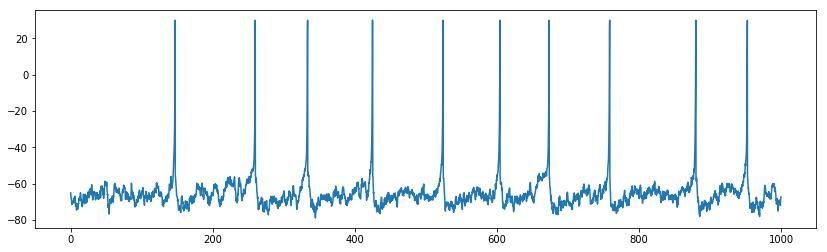

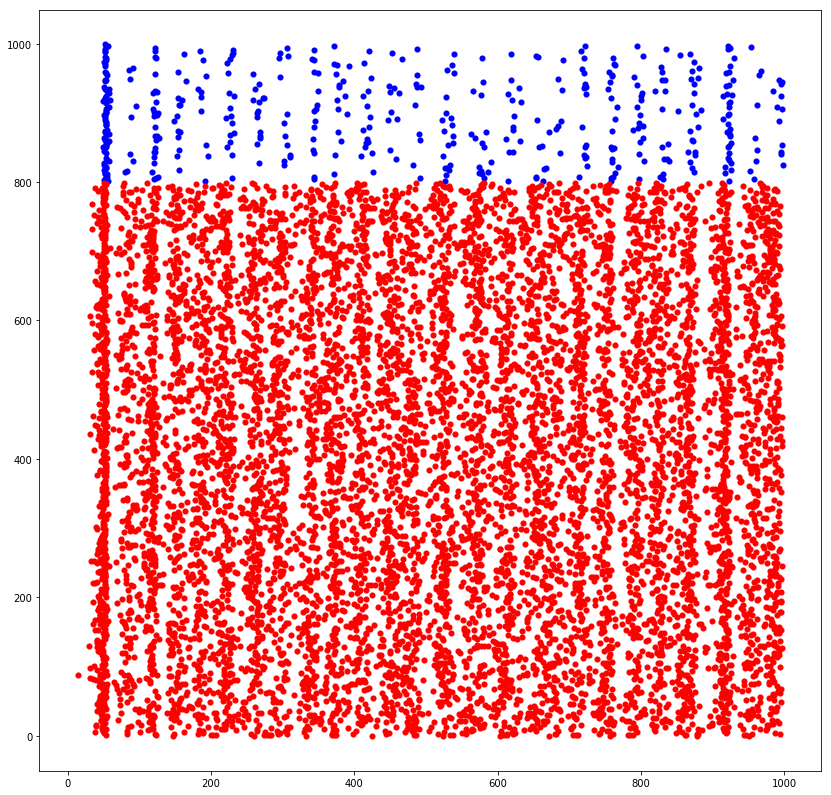

In [13]:
import random as r
#Exitatorias
def getExitatoria():
    uniforme = r.random()**2
    a = 0.02
    b = 0.2
    c = -65 + (15 * uniforme)
    d = 8 - (6 * uniforme)
    return a,b,c,d, 0.5, 5

def getInhibitoria():
    uniforme = r.random()
    a = 0.02 + 0.08 * uniforme
    b = 0.25 - 0.05 * uniforme
    c = -65
    d = 2
    return a,b,c,d, -4, 2

nExitatorias = 800
nInhibitorias = 200
neuronas = []
for i in range(nExitatorias):
    a ,b ,c , d, factorPeso, factorIntensidad = getExitatoria()
    neuronas.append(Neurona(a,b,c,d,i,factorPeso,factorIntensidad))

for i in range(nExitatorias + 1,nInhibitorias + nExitatorias):
    a ,b ,c , d, factorPeso, factorIntensidad = getInhibitoria()
    neuronas.append(Neurona(a,b,c,d,i,factorPeso,factorIntensidad))

# p de que dos nodos esten conectados 
p = 1
conecciones = 0
for neurona in neuronas:
    for posibleAdyancente in neuronas:
        if (posibleAdyancente.getId() != neurona.id and r.random() < p):
            neurona.addAdyacente(posibleAdyancente)
            conecciones += 1
print("Conecciones " + str(conecciones))
            
sistema = Sistema(neuronas)

n = 4000
for i in range(n):
    sistema.reiniciarI()
    sistema.prepararAvanzar()
    sistema.avanzar()

disparosTotales = 0
for neurona in neuronas:
    disparosTotales += neurona.disparos.count(1)
    
print("Disparos totales: " + str(disparosTotales))

# Grafico con todas las neuronas
# plt.subplots(figsize=(14,4))
# for neurona in sistema.getNeuronas():
#     plt.plot(neurona.getTime(), neurona.getV())

# Grafico con una neurona
plt.subplots(figsize=(14,4))
neurona = sistema.getNeuronas()[0]
plt.plot(neurona.getTime(), neurona.getV())

Xex = []
Yex = []
Xin = []
Yin = []
for neurona in sistema.getNeuronas():
    i = 0
    for d in neurona.disparos:
        if d == 1:
            id = neurona.getId()
            if (id >= nExitatorias):
                Xex.append(neurona.getTime()[i])
                Yex.append(id)
            else:
                Xin.append(neurona.getTime()[i])
                Yin.append(id)
        i+= 1

plt.subplots(figsize=(14,14))
plt.scatter(Xex, Yex, color='b',linewidth=0.1)  
plt.scatter(Xin, Yin, color='r',linewidth=0.1)  
plt.show()